In [2]:
import numpy as np
import pandas as pd

In [15]:
# IMU Sampling
SAMPLING_FREQUENCY = 4 # Hz
SAMPLES = 4608

# Wave Specifications
WAVE_AMPLITUDE = .5 # meters   
WAVE_PERIOD = 2 # seconds

In [16]:
GRAVITY = 9.807

In [17]:
# Frequency and angular frequency
f = 1 / WAVE_PERIOD   # frequency (Hz)
omega = 2.0 * np.pi * f  # angular frequency (rad/s)


# Create time array
dt = 1 / SAMPLING_FREQUENCY
t_end = WAVE_PERIOD
time_array = np.arange(0, SAMPLES * dt, dt)

# Compute purely vertical displacement
# d_z(t) = A * sin(omega * t)
d_z = WAVE_AMPLITUDE * np.sin(omega * time_array)

# Compute purely vertical acceleration
# a_z(t) = -A * omega^2 * sin(omega * t)
a_z = -WAVE_AMPLITUDE * (omega**2) * np.sin(omega * time_array) + GRAVITY

a_x = np.zeros_like(a_z)
a_y = np.zeros_like(a_z)
g_x = np.zeros_like(a_z)
g_y = np.zeros_like(a_z)
g_z = np.zeros_like(a_z)
m_x = np.zeros_like(a_z)
m_y = np.zeros_like(a_z)
m_z = np.zeros_like(a_z)
temp = np.zeros_like(a_z)

imu_data = np.column_stack((a_x, a_y, a_z, g_x, g_y, g_z, m_x, m_y, m_z, temp))

len(time_array)

4608

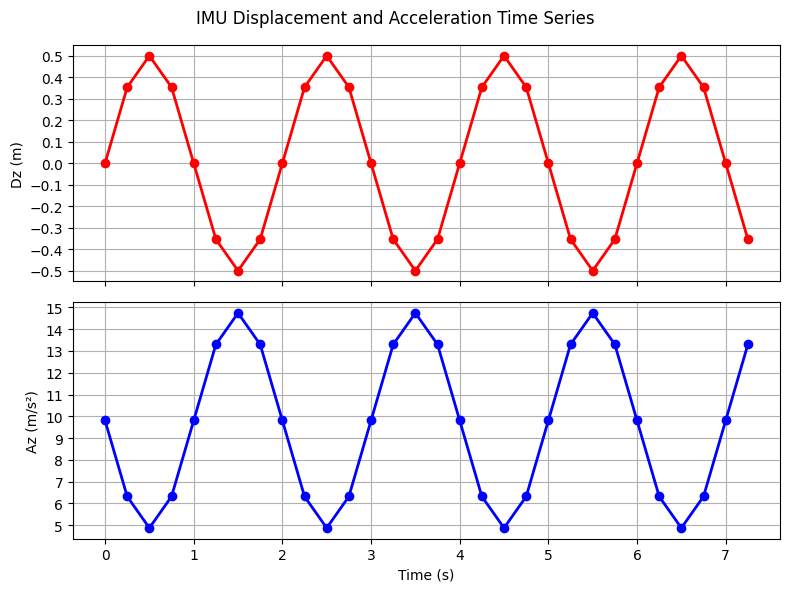

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True) # fix gridding

axes[0].plot(time_array[0:30], d_z[0:30], label="Dz (m)", linewidth=2, marker='o', markersize=6, color='r')
axes[1].plot(time_array[0:30], a_z[0:30], label="Az (m/s²)", linewidth=2, marker='o', markersize=6, color='b')

# Labels and formatting
for ax in axes:
    ax.grid(True)

axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(1))  

axes[1].set_xlabel("Time (s)")
axes[0].set_ylabel("Dz (m)")
axes[1].set_ylabel("Az (m/s²)")

# Show the plot
plt.suptitle("IMU Displacement and Acceleration Time Series")
plt.tight_layout()
plt.show()

In [19]:
# Convert to DataFrame
df = pd.DataFrame(imu_data, columns=[
    "Ax (m/s^2)", "Ay (m/s^2)", "Az (m/s^2)", 
    "Gx (deg/sec)", "Gy (deg/sec)", "Gz (deg/sec)", 
    "Mx (mTesla)", "My (mTesla)", "Mz (mTesla)", "Temp (C)"
])

# Save to CSV
csv_filename = "sim_imu_data.csv"
df.to_csv(csv_filename, index=False)